In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")
df.head(5)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


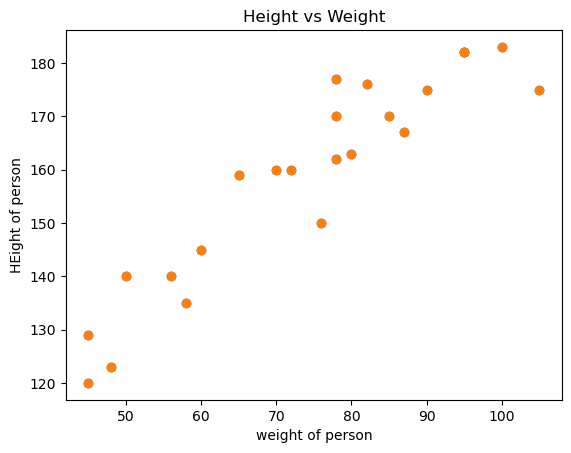

In [4]:
#scatter plot
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("weight of person")
plt.ylabel("HEight of person")
plt.title("Height vs Weight")
plt.show()


In [5]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


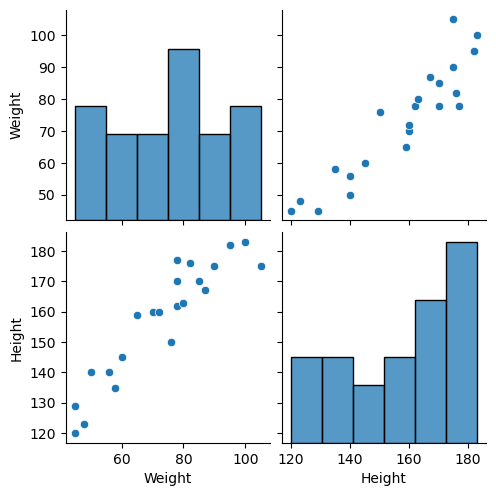

In [13]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [20]:
#independent and dependent variables
X = df[['Weight']] # make sure  X is in the form of dataframe or 2D array means 2 dimensional
Y = df['Height']# this should be in series or 1D array


In [35]:
# train and split the dataset
from sklearn.model_selection import train_test_split


In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [37]:
X_train.shape

(17, 1)

In [38]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [39]:
X_test = scaler.transform(X_test)


In [40]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [45]:
#Apply Linear Regression Model
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)


In [46]:
# fit the model
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

we are finding the bestfit line that is y=mx+c where m is the slope or coffiecnt by using the below operation we will get m value and using intercept we will get intercept value

In [49]:
regression.coef_ 


array([17.2982057])

In [50]:
regression.intercept_

156.47058823529412

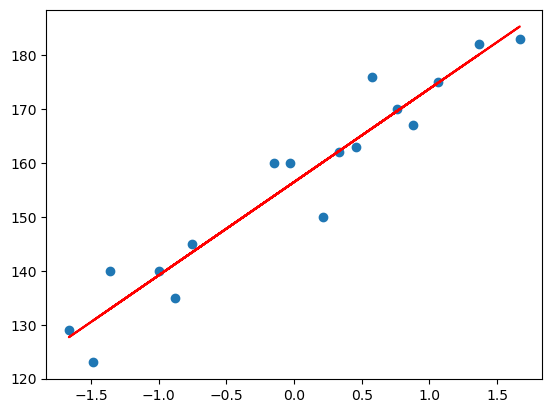

In [ ]:
# plot the data points and the regression line means best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train),color='red')
plt.show()

In [52]:
#prediction for test data 
Y_pred = regression.predict(X_test)
Y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [53]:
#perfomance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.665125886795005
R2 Score: 0.7360826717981276


In [59]:
#prediction for new data
regression.predict(scaler.transform([[input("enter the weight: ")]]))  # predict height for weight 150 lbs

c:\Users\DELL ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([139.21064662])